# Race for the Galaxy - Card Design
The card design is specified in `cards.txt` file. The reader is from `init.c > read_cards` function.

The following table describes the card design code and details

| Code | Description | Details |
|------|-------------|---------|
| # | Comment | comment line
| N | New card | card name
| T | Card type | type, cost, and value 
| E | Expansion counts | expansion the card appears
| G | Good type | good type
| F | Flags | list of (flag)
| P | Power | list of (phase, power name)
| V | VP bonus | list of (VP bonus, bonus type, VP name)

```
# cards.txt
#
# N:card name
# T:type:cost:vp
#   Type is 1: world, 2: development
# E@e0:n0@e1:n1[...]
#   Number of this card introduced at each expansion level
# G:goodtype
#   Only valid for worlds, and optional there
# F:flags
#   START world, MILITARY, WINDFALL, REBEL, ALIEN, IMPERIUM, etc
# P:phase:code:value:times
#   Times is only relevant for certain consume powers
# V:value:type:name
#   Extra victory points for 6-cost development
```


In [1]:
from rftg.enums import *

(phase, type) = PhasePower.P4_CONSUME_3_DIFF.value
print(phase, type)


4 17


In [2]:
from rftg.cards import Power

power = Power()
power.phase = 1
power.code = PhasePower.P1_DISCARD_ANY
power.value = 1
power.times = 1

json = power.to_json()
print(json)

power2 = Power.from_json(json)
print(power2)
power2

{'code': 'P1_DISCARD_ANY', 'phase': 1, 'value': 1, 'times': 1}
Power:{'code': <PhasePower.P1_DISCARD_ANY: (1, 2)>, 'phase': 1, 'value': 1, 'times': 1}


<Power 1/PhasePower.P1_DISCARD_ANY>

In [3]:
from rftg.cards import Library

library = Library()
library.read_cards('cards.txt')
library.read_card_images('card_images')

len(library.designs)

280

In [4]:
design = library.card_by_name("Old Earth")
design.to_json()

{'flags': ['START', 'START_BLUE'],
 'source': ['N:Old Earth',
  'T:1:3:2',
  'E@0:1',
  'F:START | START_BLUE',
  'P:4:TRADE_ANY:1:0',
  'P:4:CONSUME_ANY | GET_VP:1:2'],
 'name': 'Old Earth',
 'cost': 3,
 'good': 'NONE',
 'vp': 2,
 'bonuses': [],
 'expansion': {'count': 1, 'index': 0},
 'type': 'WORLD',
 'index': 6,
 'powers': [{'code': 'P4_TRADE_ANY', 'phase': 4, 'value': 1, 'times': 0},
  {'code': 'P4_CONSUME_ANY', 'phase': 4},
  {'code': 'P4_GET_VP', 'phase': 4, 'value': 1, 'times': 2}]}

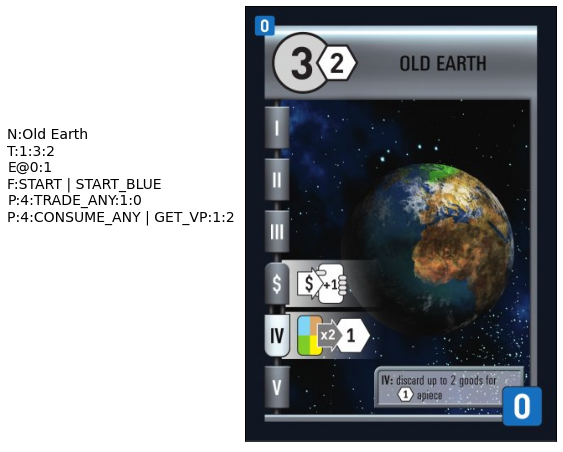

In [5]:
from rftg.display import Display

display = Display('card_images', figsize=(16, 8))
design = library.card_by_name("Old Earth")
source = '\n'.join(design.source)
fig, ax = display.plot_single_card('', design.image, source)
display.save('RFTG_Card_Design_Old_Earth.png')
display.show()

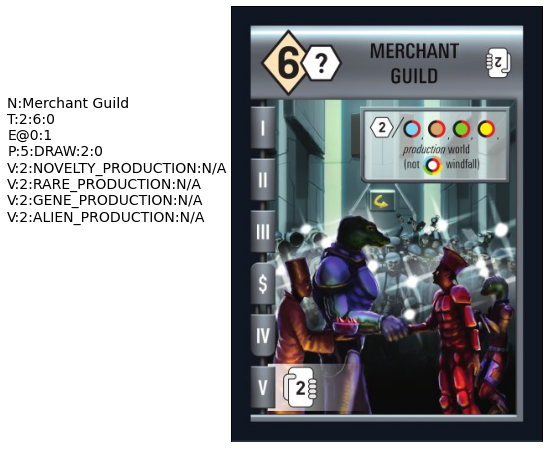

In [6]:
design = library.card_by_name("Merchant Guild")
source = '\n'.join(design.source)
fig, ax = display.plot_single_card('', design.image, source)
display.save('RFTG_Card_Design_Merchant_Guild.png')
display.show()

In [7]:
from rftg.cards import Deck

deck = Deck(library)
deck.build_deck(0)
len(deck.cards)

114

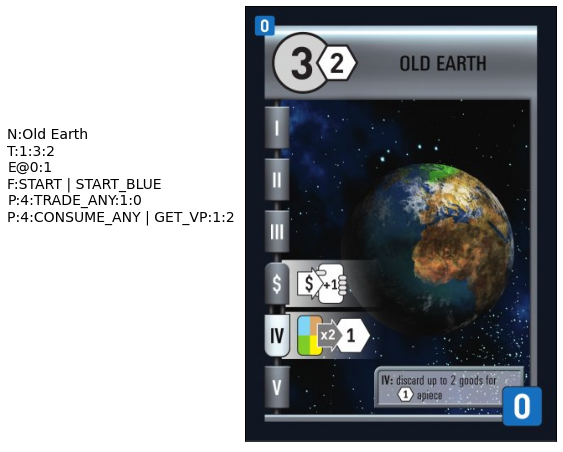

In [8]:
import random
from rftg.display import Display, CardDisplay

display = Display('card_images', figsize=(16,8))
card_display = CardDisplay(library, display)
design = library.card_by_name("Old Earth")
text = '\n'.join(design.source)
fig, ax = card_display.plot_single_card(design.name, text=text)
card_display.save('RFTG_Card_Design_Old_Earth.png')
card_display.show()


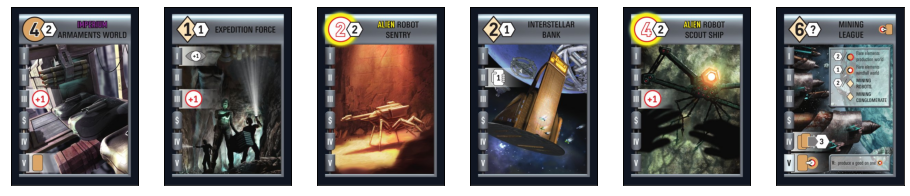

In [9]:

samples = random.sample(deck.cards, 6)
fig, ax = card_display.plot_cards(samples, 6)
card_display.save('RFTG_Deck_Card_Samples.png')
card_display.show()

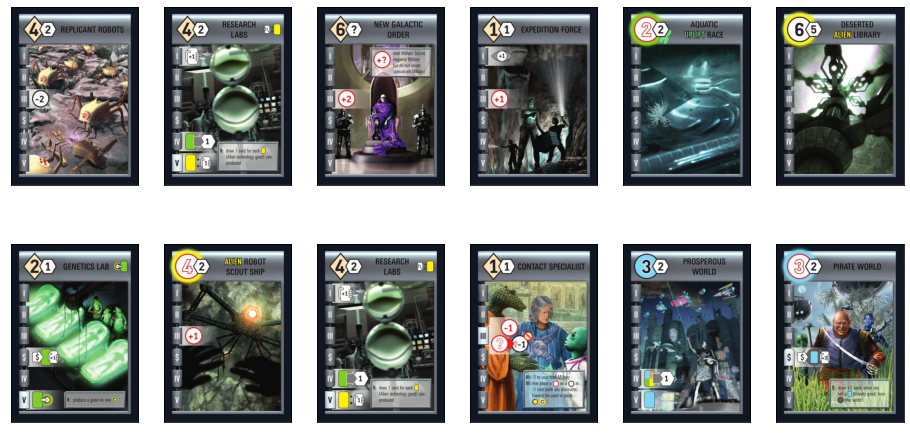

In [10]:
random.shuffle(deck.cards)
fig.ax = card_display.plot_cards(deck.cards[0:12], 6)
card_display.save('RFTG_Desk_Card_Samples_2_Rows.png')
card_display.show()